# **🔷🔸 Student Result Score Analysis**
---

## **🔹 Importing the Libraries**

In [1]:

## Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **🔹 Loading and Exploring the Dataset**

In [2]:

## Loading the dataset

df = pd.read_csv("students-result.csv")


In [3]:

## getting a sample of the dataset

print(df.head())


   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [4]:

## getting the dataset info

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:

## Describing the data

df.describe()


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:

## Shape of the dataset

df.shape


(30641, 15)

In [7]:

## checking for nulls

df.isnull().sum()


Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## **🔹 Exploratory Data Analysis**

### ***Dropping Unnamed Column***

In [8]:

## dropping the col using .drop() and axis = 1

df = df.drop("Unnamed: 0", axis = 1)


In [9]:

## checking the change

print(df.head())


   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


### ***Changing weekly study hours column***

In [10]:

## Modifying the col

df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","05-10")


In [11]:

## Verifying the change
print(df.head())


   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


## **🔹 Data Visualization**

### ***Gender Distribution***

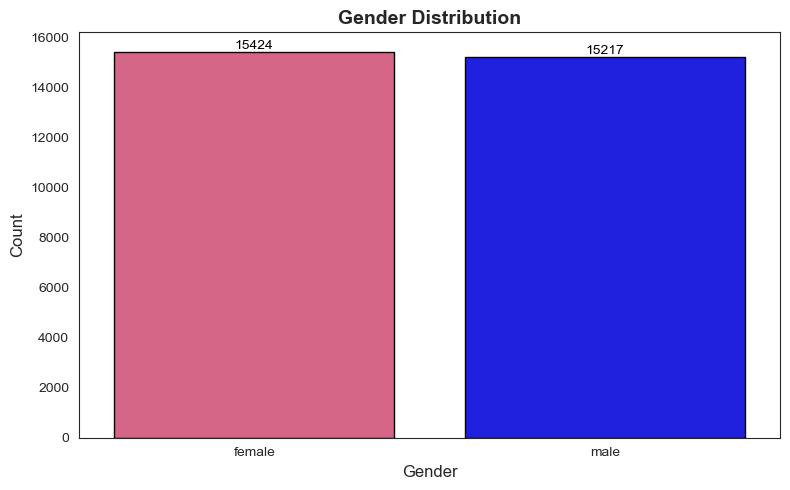

In [12]:

## Making a countplot for the gender distribution

plt.figure(figsize = (8,5))     # figure size set
sns.set_style("white")          # background style
#sns.set_palette("bright")       # color palette

ax = sns.countplot( x = "Gender", 
                    data = df, 
                    hue = "Gender",           # diff colors based on categories(gender)
                    edgecolor = "black",      # bar borders
                    palette = {"female": "#e75480", "male": "blue"} )     

# Show values on bars
for p in ax.containers:
    ax.bar_label(p, fontsize = 10, color = "black")
    
# Titles and labels
plt.title("Gender Distribution", fontsize = 14, fontweight = "bold")
plt.xlabel("Gender", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

plt.tight_layout()
plt.show()


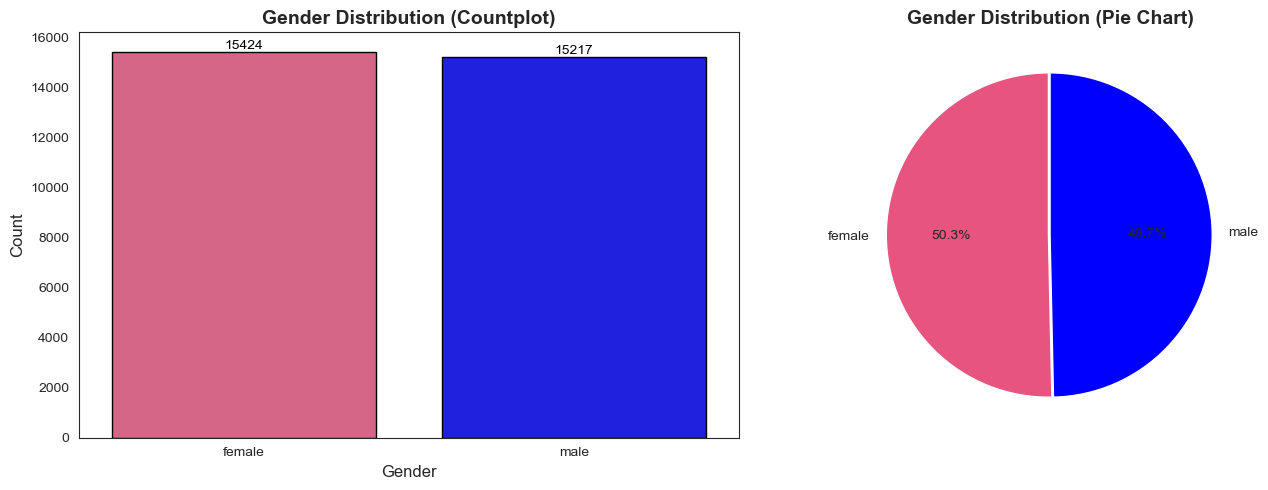

In [13]:

## Setting 2 plots side-by-side

# Set style
sns.set_style("white")

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize = (14,5))

# ---------------- Countplot ----------------

ax1 = sns.countplot( x = "Gender",
                     data = df,
                     hue = "Gender",
                     edgecolor = "black",
                     palette = {"female": "#e75480", "male": "blue"},
                     ax = axes[0] )         # plot on first subplot


# Show values on bars
for container in ax1.containers:
    ax1.bar_label(container, fontsize = 10, color = "black")

# Titles and labels
ax1.set_title("Gender Distribution (Countplot)", fontsize = 14, fontweight = "bold")
ax1.set_xlabel("Gender", fontsize = 12)
ax1.set_ylabel("Count", fontsize = 12)

# ---------------- Pie Chart ----------------

gender_counts = df["Gender"].value_counts()

axes[1].pie( gender_counts,
             labels = gender_counts.index,
             autopct = "%1.1f%%",           # show percentages with 1 decimal
             startangle = 90,               # start from top
             colors = ["#e75480", "blue"],  # same colors as countplot
             explode = [0.01, 0] )          # highlight first slice (optional)


axes[1].set_title("Gender Distribution (Pie Chart)", fontsize = 14, fontweight = "bold")

# Adjusting and showing layout
plt.tight_layout()
plt.show()


- #### **`Insight`** - The no. of females in the data is more than the no. of male.

### ***Factors Impacting Students Result***

- #### 1. **Parents Educational Imapct on Students Result**

In [14]:

## creating a groupby

gb = df.groupby("ParentEduc").agg({"MathScore":'mean' , "ReadingScore":'mean' , "WritingScore":'mean'})
print(gb)


                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


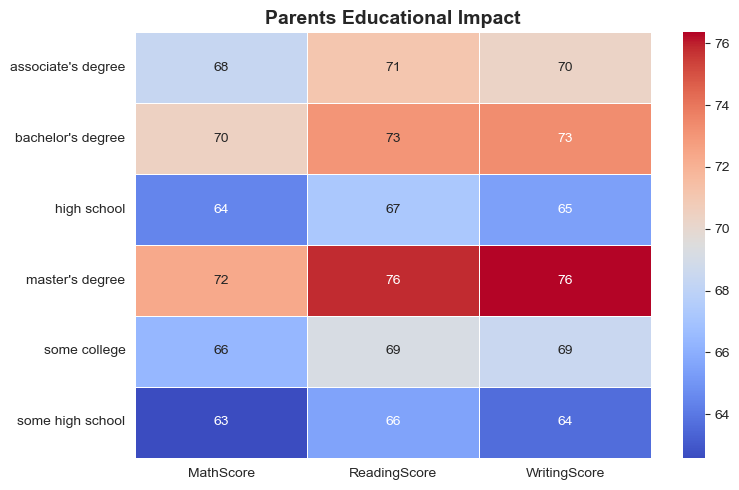

In [15]:

# Set the overall style for the plot (professional look)
sns.set_style("whitegrid")

# Define the figure size for better readability
plt.figure(figsize = (8,5))

# Create the heatmap
ax = sns.heatmap( gb,                  # data to visualize
                  annot = True,        # show values inside the cells
                  fmt = ".0f",         # format numbers (no decimals here)
                  cmap = "coolwarm",   # color palette for better contrast
                  linewidths = 0.5,    # thin lines between cells
                  cbar = True          # show color bar on the side ,  by default its true
)

# Add a clear title to explain the visualization
plt.title("Parents Educational Impact", fontsize = 14, fontweight = "bold")
plt.ylabel("")

plt.tight_layout()
plt.show()


- #### **`Insight`** - We have concluded that the Education of the parents have a good impact on the student's score.

- #### 2. **Parents MArital Status Imapct on Students Result**

In [16]:

## creating a groupby

gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean' , "ReadingScore":'mean' , "WritingScore":'mean'})
print(gb1)


                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


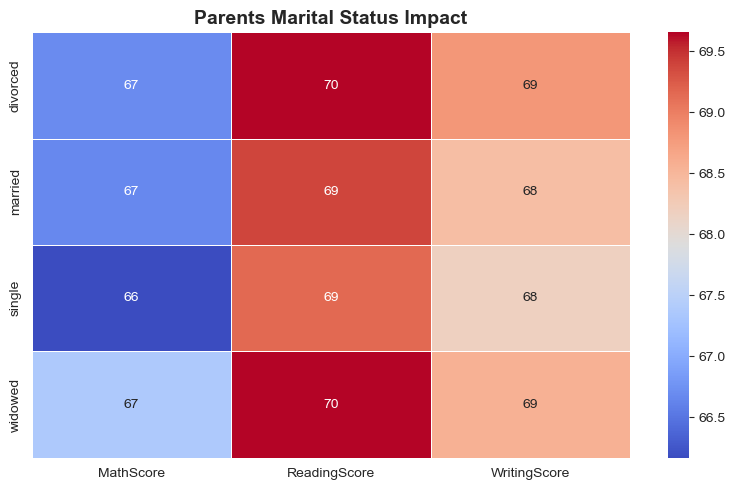

In [17]:

# Set the overall style for the plot (professional look)
sns.set_style("white")

# Define the figure size for better readability
plt.figure(figsize = (8,5))

# Creating the heatmap
ax = sns.heatmap( gb1,                  # data to visualize
                  annot = True,        # show values inside the cells
                  fmt = ".0f",         # format numbers (no decimals here)
                  cmap = "coolwarm",   # color palette for better contrast
                  linewidths = 0.5,    # thin lines between cells
                  cbar = True          # show color bar on the side ,  by default its true
)

# Add a clear title to explain the visualization
plt.title("Parents Marital Status Impact", fontsize = 14, fontweight = "bold")
plt.ylabel("")

plt.tight_layout()
plt.show()


- #### **`Insight`** - We have concluded that the Marital Status of the parents have a no/negligible impact on the student's score.

### ***Detecting Outliers***

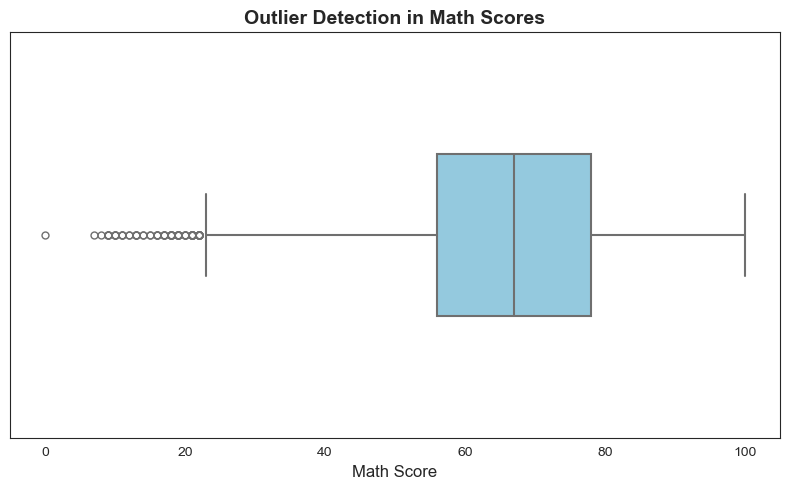

In [18]:

# Set a clean style for the plot
sns.set_style("white")

# Define figure size for better readability
plt.figure(figsize = (8,5))

# Create a boxplot to check outliers in MathScore
ax = sns.boxplot( data = df, 
                  x = "MathScore",
                  color = "skyblue",          # soft color for professional look
                  width = 0.4,                # box width
                  fliersize = 5,              # size of outlier markers
                  linewidth = 1.5 )           # thickness of box lines

# Add a clear title and axis label
plt.title("Outlier Detection in Math Scores", fontsize = 14, fontweight = "bold")
plt.xlabel("Math Score", fontsize = 12)

# Adjust layout and Display the plot
plt.tight_layout()
plt.show()


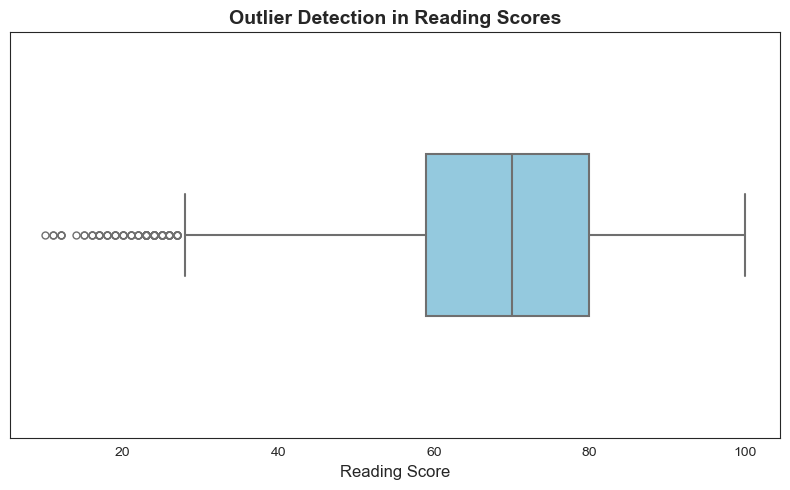

In [20]:

# Set a clean style for the plot
sns.set_style("white")

# Define figure size for better readability
plt.figure(figsize = (8,5))

# Create a boxplot to check outliers in ReadingScore
ax = sns.boxplot( data = df, 
                  x = "ReadingScore",
                  color = "skyblue",          # soft color for professional look
                  width = 0.4,               # box width
                  fliersize = 5,             # size of outlier markers
                  linewidth = 1.5 )          # thickness of box lines

# Add a clear title and axis label
plt.title("Outlier Detection in Reading Scores", fontsize = 14, fontweight = "bold")
plt.xlabel("Reading Score", fontsize = 12)

# Adjust layout and Display the plot
plt.tight_layout()
plt.show()


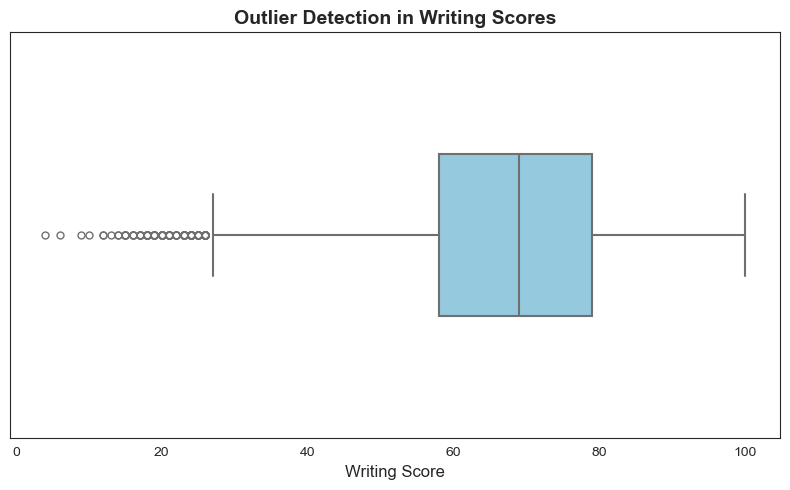

In [19]:

# Set a clean style for the plot
sns.set_style("white")

# Define figure size for better readability
plt.figure(figsize = (8,5))

# Create a boxplot to check outliers in WritingScore
ax = sns.boxplot( data = df, 
                  x = "WritingScore",
                  color = "skyblue",          # soft color for professional look
                  width = 0.4,               # box width
                  fliersize = 5,             # size of outlier markers
                  linewidth = 1.5 )          # thickness of box lines

# Add a clear title and axis label
plt.title("Outlier Detection in Writing Scores", fontsize = 14, fontweight = "bold")
plt.xlabel("Writing Score", fontsize = 12)

# Adjust layout and Display the plot
plt.tight_layout()
plt.show()


### ***Distribution of Ethnic Groups***

In [21]:

## Getting the unique values list from Ethnic Group

print(df['EthnicGroup'].unique())


[nan 'group C' 'group B' 'group A' 'group D' 'group E']


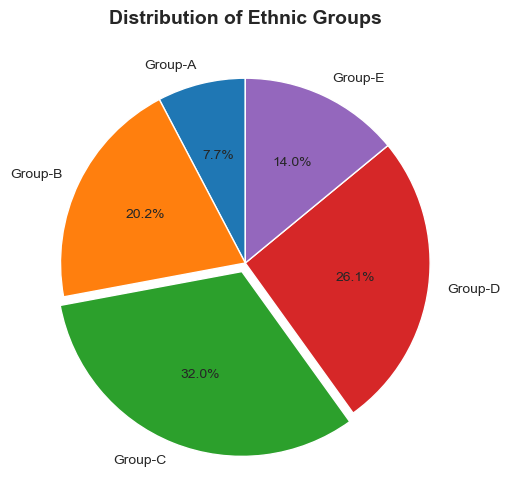

In [22]:

# Count the number of rows for each EthnicGroup
groupA = df.loc[df['EthnicGroup'] == "group A"].count()
groupB = df.loc[df['EthnicGroup'] == "group B"].count()
groupC = df.loc[df['EthnicGroup'] == "group C"].count()
groupD = df.loc[df['EthnicGroup'] == "group D"].count()
groupE = df.loc[df['EthnicGroup'] == "group E"].count()

# Extract only the counts of 'EthnicGroup' column into a list
mylist = [ groupA["EthnicGroup"],
           groupB["EthnicGroup"],
           groupC["EthnicGroup"],
           groupD["EthnicGroup"],
           groupE["EthnicGroup"] ]

# Create a pie chart
plt.figure(figsize = (6,6))  

plt.pie( mylist, 
         labels = ['Group-A','Group-B','Group-C','Group-D','Group-E'],  
         autopct = "%1.1f%%",   
         startangle = 90,                                                   # rotate chart to start at 90 degrees
         colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"],  # custom colors
         explode = [0,0,0.05,0,0] )                                         # slightly highlight Group-C slice


# Add a title for clarity
plt.title("Distribution of Ethnic Groups", fontsize = 14, fontweight = "bold")

# Display the chart
plt.show()


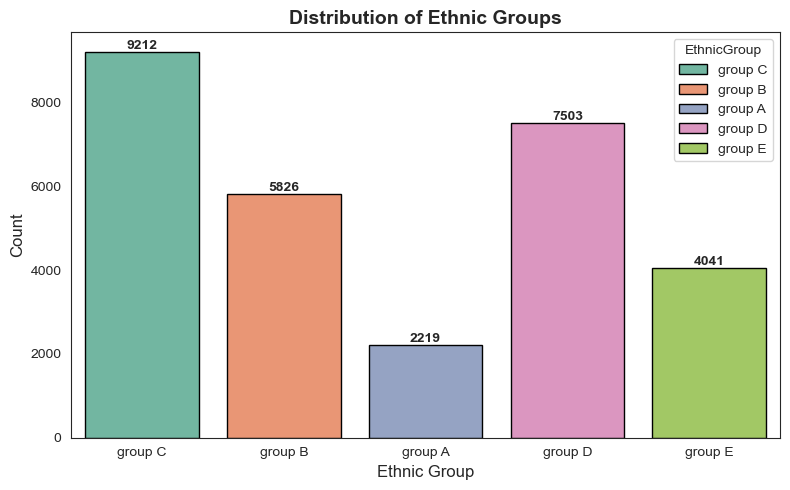

In [23]:

# Set a clean style for the plot
sns.set_style("white")

# Create the countplot for EthnicGroup column
plt.figure(figsize = (8,5)) 

ax = sns.countplot( data = df, 
                    x = 'EthnicGroup',
                    hue = 'EthnicGroup',
                    palette = "Set2",        # use a professional color palette
                    edgecolor = "black" )     # add borders to bars for clarity


# Add labels (counts) on top of each bar
for container in ax.containers:
    ax.bar_label(container, fontsize = 10, fontweight = "bold")

# Add title and axis labels
plt.title("Distribution of Ethnic Groups", fontsize = 14, fontweight = "bold")
plt.xlabel("Ethnic Group", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Adjust and showing plot
plt.tight_layout()
plt.show()



---

### By - **Sandeep Singh Yadav**
- #### **🔗 GitHub - https://github.com/ViaSandeep**
- #### **🔗 LinkedIn - www.linkedin.com/in/viasandeep**

### **Thank You !**